In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import random


In [2]:
import h5py

def inspect_h5_file(file_path):
    with h5py.File(file_path, "r") as f:
        print(f"Keys in {file_path}: {list(f.keys())}")

# Inspect both the training and testing datasets
inspect_h5_file('D:\SEM-5\Deep Learning\Home Assignments\Lab-1\Train.h5')
inspect_h5_file('D:\SEM-5\Deep Learning\Home Assignments\Lab-1\Test.h5')


Keys in D:\SEM-5\Deep Learning\Home Assignments\Lab-1\Train.h5: ['images', 'labels']
Keys in D:\SEM-5\Deep Learning\Home Assignments\Lab-1\Test.h5: ['images', 'labels']


In [3]:
def load_data(train_file, test_file):
    with h5py.File(train_file, "r") as train_dataset:
        X_train = np.array(train_dataset["images"][:]) 
        Y_train = np.array(train_dataset["labels"][:]) 
    
    with h5py.File(test_file, "r") as test_dataset:
        X_test = np.array(test_dataset["images"][:])    
        Y_test = np.array(test_dataset["labels"][:])  
    
    return X_train, Y_train, X_test, Y_test

# Load the data with the correct keys
X_train, Y_train, X_test, Y_test = load_data('D:\SEM-5\Deep Learning\Home Assignments\Lab-1\Train.h5', 'D:\SEM-5\Deep Learning\Home Assignments\Lab-1\Test.h5')


In [4]:
# Preprocess data (e.g., normalization)
X_train = X_train / 255.
X_test = X_test / 255.


In [5]:
# Determine the number of classes
num_classes = len(np.unique(Y_train))
num_classes


5

In [6]:
# One-hot encode the labels
Y_train = np.eye(num_classes)[Y_train.reshape(-1)]
Y_test = np.eye(num_classes)[Y_test.reshape(-1)]

Implement the Softmax Activation Function

In [7]:
def softmax(Z):
    exp_Z = np.exp(Z - np.max(Z, axis=1, keepdims=True))
    return exp_Z / np.sum(exp_Z, axis=1, keepdims=True)


Define the Cost Function

In [8]:
def compute_cost(Y, Y_hat):
    m = Y.shape[0]
    cost = -np.sum(Y * np.log(Y_hat)) / m
    return cost


Implement Gradient Descent

In [9]:
def gradient_descent(X, Y, alpha, num_iterations):
    m, n_x = X.shape
    n_y = Y.shape[1]
    
    W = np.random.randn(n_x, n_y) * 0.01
    b = np.zeros((1, n_y))
    
    for i in range(num_iterations):
        Z = np.dot(X, W) + b
        A = softmax(Z)
        
        cost = compute_cost(Y, A)
        
        dW = np.dot(X.T, (A - Y)) / m
        db = np.sum(A - Y, axis=0, keepdims=True) / m
        
        W = W - alpha * dW
        b = b - alpha * db
        
        if i % 100 == 0:
            print(f"Iteration {i}, Cost: {cost}")
    
    return W, b


In [10]:
def predict(X, W, b):
    # Flatten each image to a vector of size (num_px * num_px * 3)
    X = X.reshape(X.shape[0], -1)
    
    Z = np.dot(X, W) + b
    A = softmax(Z)
    return np.argmax(A, axis=1)


In [11]:
# Flatten the training data and train the model
W, b = gradient_descent(X_train.reshape(X_train.shape[0], -1), Y_train, alpha=0.01, num_iterations=1000)

Iteration 0, Cost: 1.942623908248232
Iteration 100, Cost: 11.099405121341764
Iteration 200, Cost: 9.308982759626637
Iteration 300, Cost: 5.6189658510142495
Iteration 400, Cost: 10.24758593833578
Iteration 500, Cost: 8.416110253981488
Iteration 600, Cost: 8.616305259038688
Iteration 700, Cost: 7.163539104777447
Iteration 800, Cost: 4.813555731798605
Iteration 900, Cost: 8.128578884545368


In [12]:
# Predict and evaluate on the test set
Y_pred = predict(X_test, W, b)
accuracy = np.mean(Y_pred == np.argmax(Y_test, axis=1)) * 100
print(f"Test set accuracy: {accuracy}%")

Test set accuracy: 38.333333333333336%


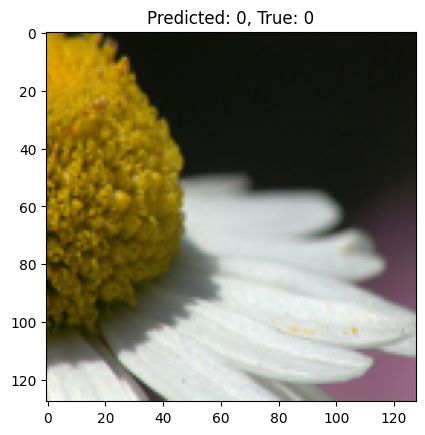

In [13]:
# Select a random image from the test set
index = random.randint(0, X_test.shape[0] - 1)
random_image = X_test[index]
random_label = Y_test[index]

# Predict the class of the random image
predicted_class = predict(random_image.reshape(1, -3), W, b)

# Show the image and prediction
plt.imshow(random_image)
plt.title(f"Predicted: {predicted_class[0]}, True: {np.argmax(random_label)}")
plt.show()
